## Practica#6: Clasificacion de Datos

El modelo k-Nearest Neighbors (k-NN) es un algoritmo de aprendizaje supervisado que clasifica o predice nuevos datos basándose en la cercanía de puntos en un espacio de características

In [1]:
# importamos librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\trabajos facu\7mo semestre\AYDR_Tareas_MineriaDeDatos\csv\steam_limpio.csv'
, encoding='latin-1')      #recordar poner la direccion del csv steam_limpio csv

In [3]:
# Crear una columna categórica para la clasificación
# Ejemplo: Calificar juegos como "Populares" o "No populares" según calificaciones positivas
df['popular'] = (df['positive_ratings'] > df['positive_ratings'].median()).astype(int)

# Seleccionar variables independientes y dependiente
X = df[['price', 'average_playtime', 'negative_ratings']]  # Variables independientes
y = df['popular']  # Variable dependiente (0 = No popular, 1 = Popular)

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características para k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo k-NN
k = 25  # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred = knn.predict(X_test_scaled)

# ---------------------------------
# Evaluación del Modelo
# ---------------------------------

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("=== MATRIZ DE CONFUSIÓN ===")
print(cm)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(report)

=== MATRIZ DE CONFUSIÓN ===
[[2341  348]
 [ 491 2235]]

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2689
           1       0.87      0.82      0.84      2726

    accuracy                           0.85      5415
   macro avg       0.85      0.85      0.85      5415
weighted avg       0.85      0.85      0.84      5415



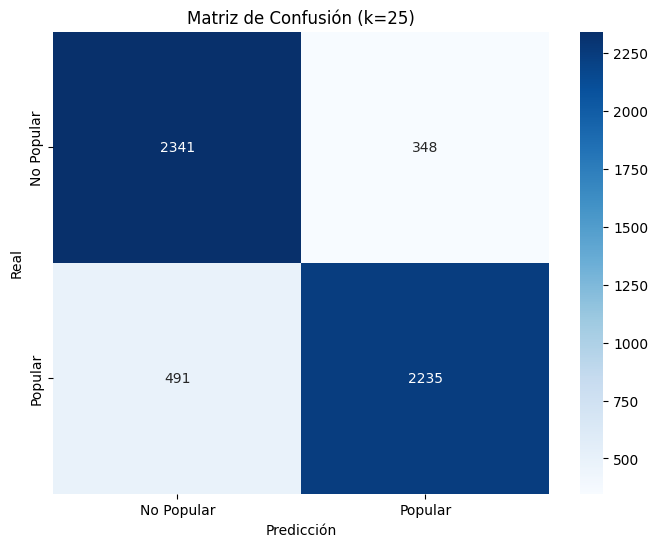

In [4]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Popular', 'Popular'], yticklabels=['No Popular', 'Popular'])
plt.title(f"Matriz de Confusión (k={k})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()